In [1]:
#Importamos las librerías que vamos a utilizar
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from sklearn import preprocessing

In [2]:
#Controlamos la versión de seaborn
seaborn.__version__

'0.9.0'

In [3]:
#Controlamos la versión de panda
pandas.__version__

'0.24.2'

In [4]:
#Levantamos el set de datos y visualizamos sus cantidades
dataset = pandas.read_csv('./datasets/hfi_cc_2018.csv')
dataset.shape #Nos mostrará primero las filas y luego la cantidad de columnas.

(1458, 123)

In [5]:
#Verificamos que columnas se encuentran disponibles en el set de datos
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [6]:
#Mostramos el dataset completo
dataset

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
5,2016,AUS,Australia,Oceania,8.439110,7.525648,7.364078,7.776279,9.623538,10.0,...,7.238900,8.944387,8.823021,8.121631,8.465526,7.98,10.0,8.582219,4.0,1.0
6,2016,AUT,Austria,Western Europe,8.969832,7.872188,7.673227,8.171749,9.737912,10.0,...,6.418890,7.296116,8.531578,7.419870,7.371334,7.58,27.0,8.413474,16.0,1.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,NaN,NaN,NaN,4.270861,9.143499,10.0,...,5.353533,6.959699,7.814181,7.080078,6.874880,6.49,106.0,6.083277,130.0,4.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,6.930835,6.008696,6.262840,6.400790,0.000000,10.0,...,NaN,7.981672,7.388227,7.523034,8.169125,7.34,49.0,7.397269,50.0,2.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,NaN,NaN,5.900339,9.790481,10.0,...,6.596745,8.074670,9.680534,8.018774,7.415786,7.56,30.0,6.848035,75.0,2.0


In [7]:
#Obtenemos las columnas con las que vamos a trabajar el práctico

important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


In [8]:
#Filtramos únicamente por aquellos valores que corresponden a la región de América Latina.
LA = dataset[dataset.region == 'Latin America & the Caribbean']
LA = LA[important_cols]
#Hacemos lo mismo pero para el resto del mundo
RM = dataset[dataset.region != 'Latin America & the Caribbean']
RM = RM[important_cols]


### 1.1 Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [9]:
#Mostramos el rango de las columnas que marcamos como importantes
dataset[important_cols].describe().loc[['min','max']]

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
min,2008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.88,1.0,3.765827,1.0
max,2016.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.19,162.0,9.126313,162.0


In [10]:
#Mostramos ahora el rango de las columnas que mas utilizaremos en el práctico
practico_cols = ['year','countries','ISO_code','region','pf_identity','ef_score','hf_score']
dataset[practico_cols].describe().loc[['min','max']]

,year,pf_identity,ef_score,hf_score
min,2008.0,0.0,2.88,3.765827
max,2016.0,10.0,9.19,9.126313


### Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda?

In [11]:
#Obtenemos la media de las variables que nos interesan
pf_media = dataset['pf_identity'].mean()
hf_media = dataset['hf_score'].mean()
pf_mediana = dataset['pf_identity'].median()
hf_mediana = dataset['hf_score'].median()
pf_de = dataset['pf_identity'].std()
hf_de = dataset['hf_score'].std()
print("Valores generales \n")
print('Media de pf_identity: ' + str(pf_media))
print('Media de hf_score: ' + str(hf_media))
print('Mediana de pf_identity: ' + str(pf_mediana))
print('Mediana de hf_score: ' + str(hf_mediana))
print('Desviación estándar de pf_identity: ' + str(pf_de))
print('Desviación estándar de hf_score: ' + str(hf_de))
print(' \n')
#Obtenemos para America Latina
la_pf_media = LA['pf_identity'].mean()
la_hf_media = LA['hf_score'].mean()
la_pf_mediana = LA['pf_identity'].median()
la_hf_mediana = LA['hf_score'].median()
la_pf_de = LA['pf_identity'].std()
la_hf_de = LA['hf_score'].std()
print("América Latina \n")
print('Media de pf_identity: ' + str(la_pf_media))
print('Media de hf_score: ' + str(la_hf_media))
print('Mediana de pf_identity: ' + str(la_pf_mediana))
print('Mediana de hf_score: ' + str(la_hf_mediana))
print('Desviación estándar de pf_identity: ' + str(la_pf_de))
print('Desviación estándar de hf_score: ' + str(la_hf_de))
print(' \n')
#Obtenemos para el resto del mundo
rm_pf_media = RM['pf_identity'].mean()
rm_hf_media = RM['hf_score'].mean()
rm_pf_mediana = RM['pf_identity'].median()
rm_hf_mediana = RM['hf_score'].median()
rm_pf_de = RM['pf_identity'].std()
rm_hf_de = RM['hf_score'].std()
print("Resto del Mundo \n")
print('Media de pf_identity: ' + str(rm_pf_media))
print('Media de hf_score: ' + str(rm_hf_media))
print('Mediana de pf_identity: ' + str(rm_pf_mediana))
print('Mediana de hf_score: ' + str(rm_hf_mediana))
print('Desviación estándar de pf_identity: ' + str(rm_pf_de))
print('Desviación estándar de hf_score: ' + str(rm_hf_de))


Valores generales 

Media de pf_identity: 7.33417997096807
Media de hf_score: 6.9934437555145
Mediana de pf_identity: 9.166666667000001
Mediana de hf_score: 6.923840432999999
Desviación estándar de pf_identity: 3.159472661477449
Desviación estándar de hf_score: 1.0258111611874141
 

América Latina 

Media de pf_identity: 8.765086206909483
Media de hf_score: 7.047981929952582
Mediana de pf_identity: 10.0
Mediana de hf_score: 7.02804474
Desviación estándar de pf_identity: 1.7117319741534658
Desviación estándar de hf_score: 0.6089040915687837
 

Resto del Mundo 

Media de pf_identity: 7.044502617793195
Media de hf_score: 6.982402868542753
Mediana de pf_identity: 8.333333332999999
Mediana de hf_score: 6.867190743
Desviación estándar de pf_identity: 3.3037709960911754
Desviación estándar de hf_score: 1.0908612143714618


### 1.2 ¿Tiene sentido calcular la moda de las variables pf_identity y hf_score?

No tiene sentido calcular la moda en todos los años al mismo tiempo. Lo lógico sería ver la moda en un año en particular para poder cruzarlo con diversos hechos históricos en la región para el año en cuestión y de esa manera analizar como afectó el hecho historico.

### 1.3 ¿Son todos los valores de pf_identity y hf_score directamente comparables?

Los valores de pf_identity y hf_score no son directamente comparables, pero si pueden ser directamente comparables si los obtenemos anualmente. Es decir, no tiene sentido comparar estos valores sin dar importancia al año en el cual estamos comparando los valores, sin embargo si tiene sentido realizar esta comparación año por año. La otra variable que podría influenciar a hf_score es ef_score

### 1.4 ¿Cómo pueden sanearse los valores faltantes?

Existen múltiples formas de sanear los valores faltantes.

1. Quitar las filas de los valores nulos.
2. Rellenar con el promedio de los países.
3. Rellenar con el promedio de los países de la región o de aquellos que creemos que tienen características similares.

En cuanto a quitar los outliers, consideramos que no es correcto quitarlos debido a que el porcentaje de países que se encuentran "englobados" con estos puede tener un impacto grande en el dataset.

### 1.5 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

Para poder identificar los outliers tomaremos como método identificar aquellas que la media supere 2 veces y media la desviación estándar.
Para identificarlas vía código lo que debemos hacer es crear una mascara que permita tomar esta configuración.
No los eliminaríamos del conjunto de datos, pero de ser necesario trabajaríamos con una mascara que permita "no tenerlos en cuenta"

#### A continuación mostramos de manera práctica los Outliers


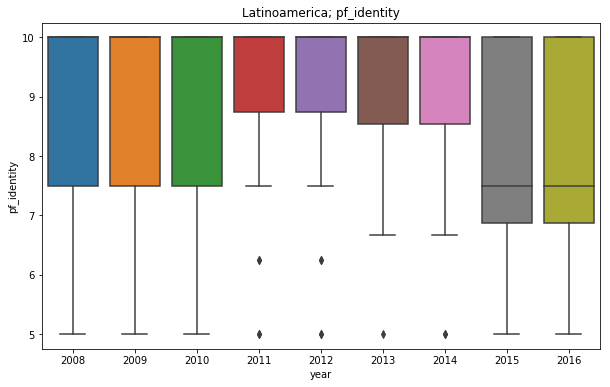

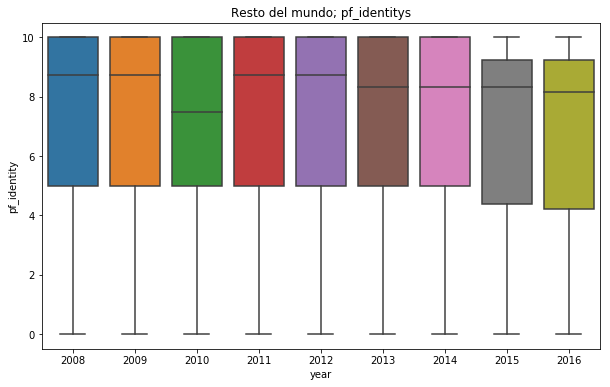

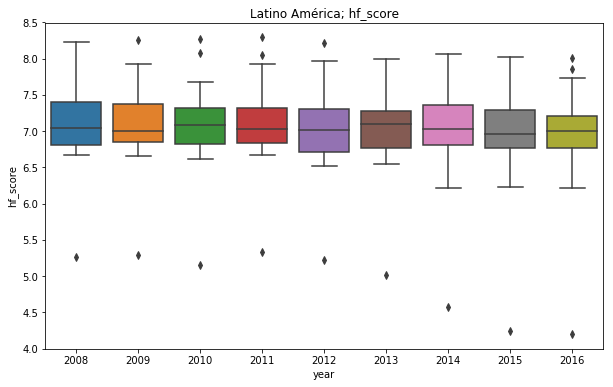

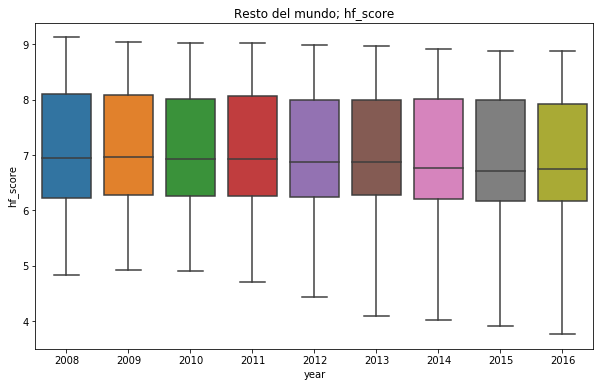

In [12]:
#Visualizamos los outliers

#fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)

#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.rcParams['figure.figsize']=(10,6)
seaborn.boxplot(x=LA['year'],
                y=LA['pf_identity'])
plt.title('Latinoamerica; pf_identity')
plt.show()


seaborn.boxplot(x=RM['year'],
                y=RM['pf_identity'])
plt.title('Resto del mundo; pf_identitys')
plt.show()



seaborn.boxplot(x=LA['year'],
                y=LA['hf_score'])
plt.title('Latino América; hf_score')
plt.show()


seaborn.boxplot(x=RM['year'],
                y=RM['hf_score'])
plt.title('Resto del mundo; hf_score')
plt.show()

## 2. Agregación de datos

### 2.1 Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

In [13]:
#Para graficar la media a través de los años primero obtenemos el subset de datos a trabajar utilizando un agrupamiento

XA = dataset.groupby('year')['pf_identity','hf_score'].mean()
XA['year'] = XA.index
XA


,pf_identity,hf_score,year
year,,,
2008,7.517730,7.069785,2008
2009,7.517730,7.075678,2009
2010,7.303922,7.036396,2010
2011,7.467320,7.031203,2011
2012,7.467320,6.985917,2012
2013,7.364650,6.983139,2013
2014,7.387317,6.958734,2014
2015,7.062893,6.932810,2015
2016,6.976337,6.889871,2016


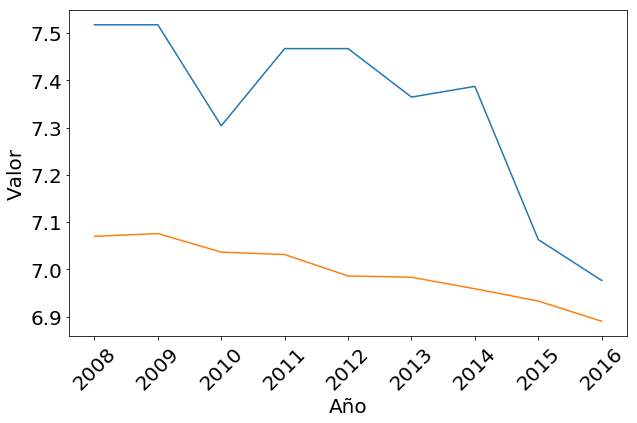

In [14]:
#Luego graficamos la media a través de los años
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,6))
seaborn.lineplot(data=XA, x='year', y='pf_identity')
seaborn.lineplot(data=XA, x='year', y='hf_score')
plt.ylabel('Valor')
plt.xlabel('Año')
plt.xticks(rotation=45);

### 2.2 Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

In [15]:
#Enmascaramos el dataset para que agrupe por región por año
XAR = dataset.groupby(['year','region'], as_index=False)['pf_identity','hf_score'].mean()
#Mostramos las primeras 5 filas para no "ocupar demasiado espacio"
XAR[:5]

,year,region,pf_identity,hf_score
0,2008,Caucasus & Central Asia,9.500000,7.027743
1,2008,East Asia,10.000000,7.741378
2,2008,Eastern Europe,9.880952,7.710244
3,2008,Latin America & the Caribbean,8.900000,7.118196
4,2008,Middle East & North Africa,3.653846,6.342013


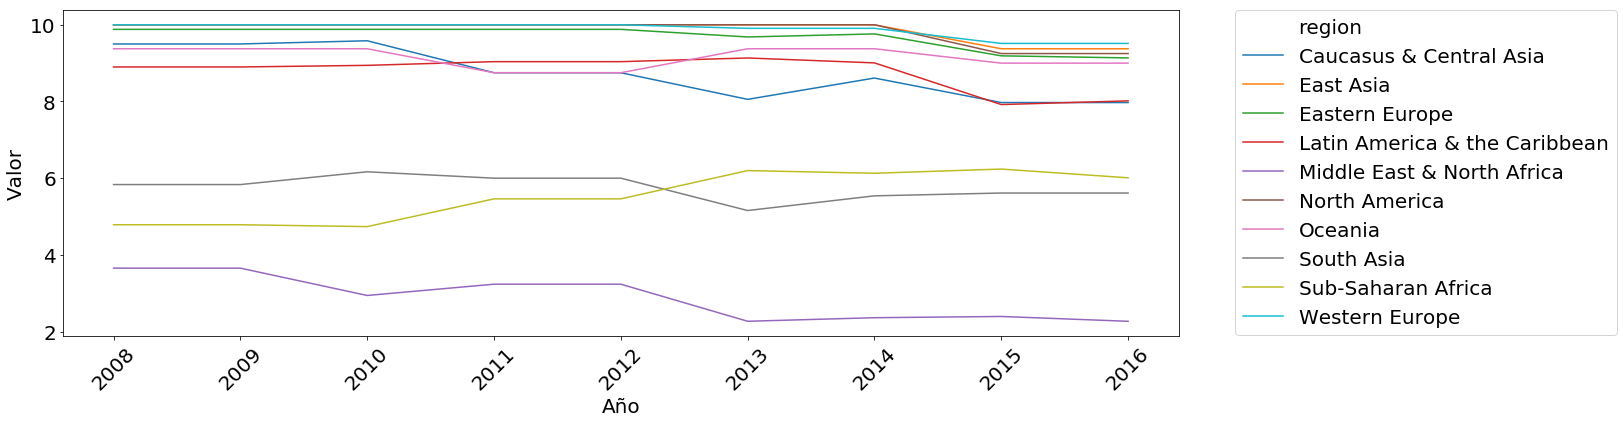

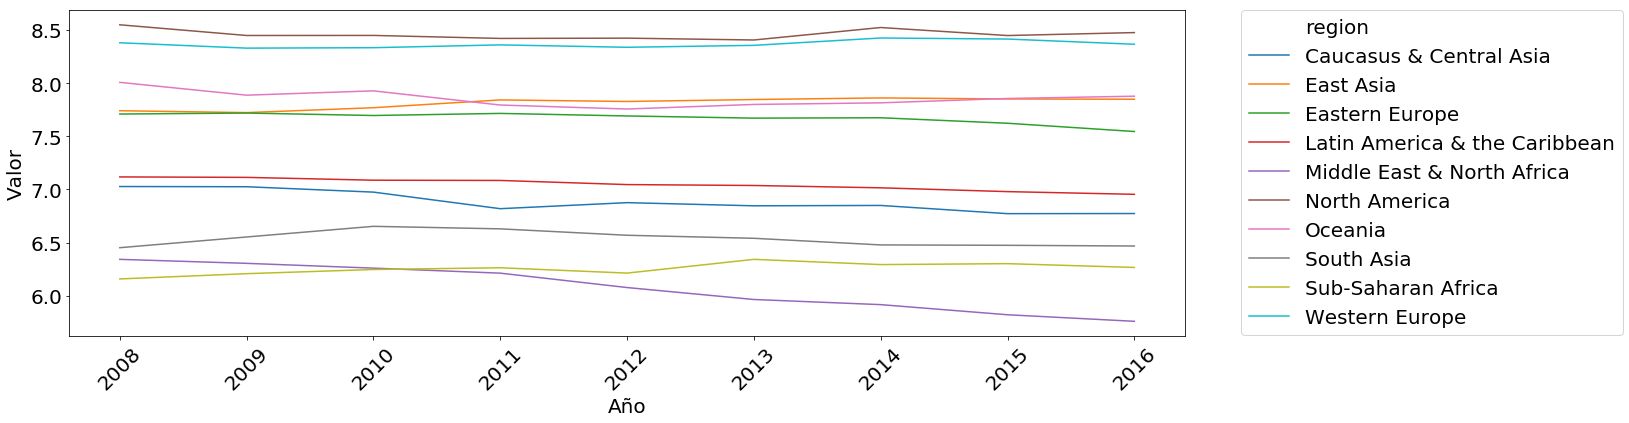

In [16]:
#Graficamos

plt.figure(figsize=(20,6))
seaborn.lineplot(data=XAR, x='year', y='pf_identity', hue = 'region')
plt.ylabel('Valor')
plt.xlabel('Año')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45);

plt.figure(figsize=(20,6))
seaborn.lineplot(data=XAR, x='year', y='hf_score', hue = 'region')
plt.ylabel('Valor')
plt.xlabel('Año')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45);

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


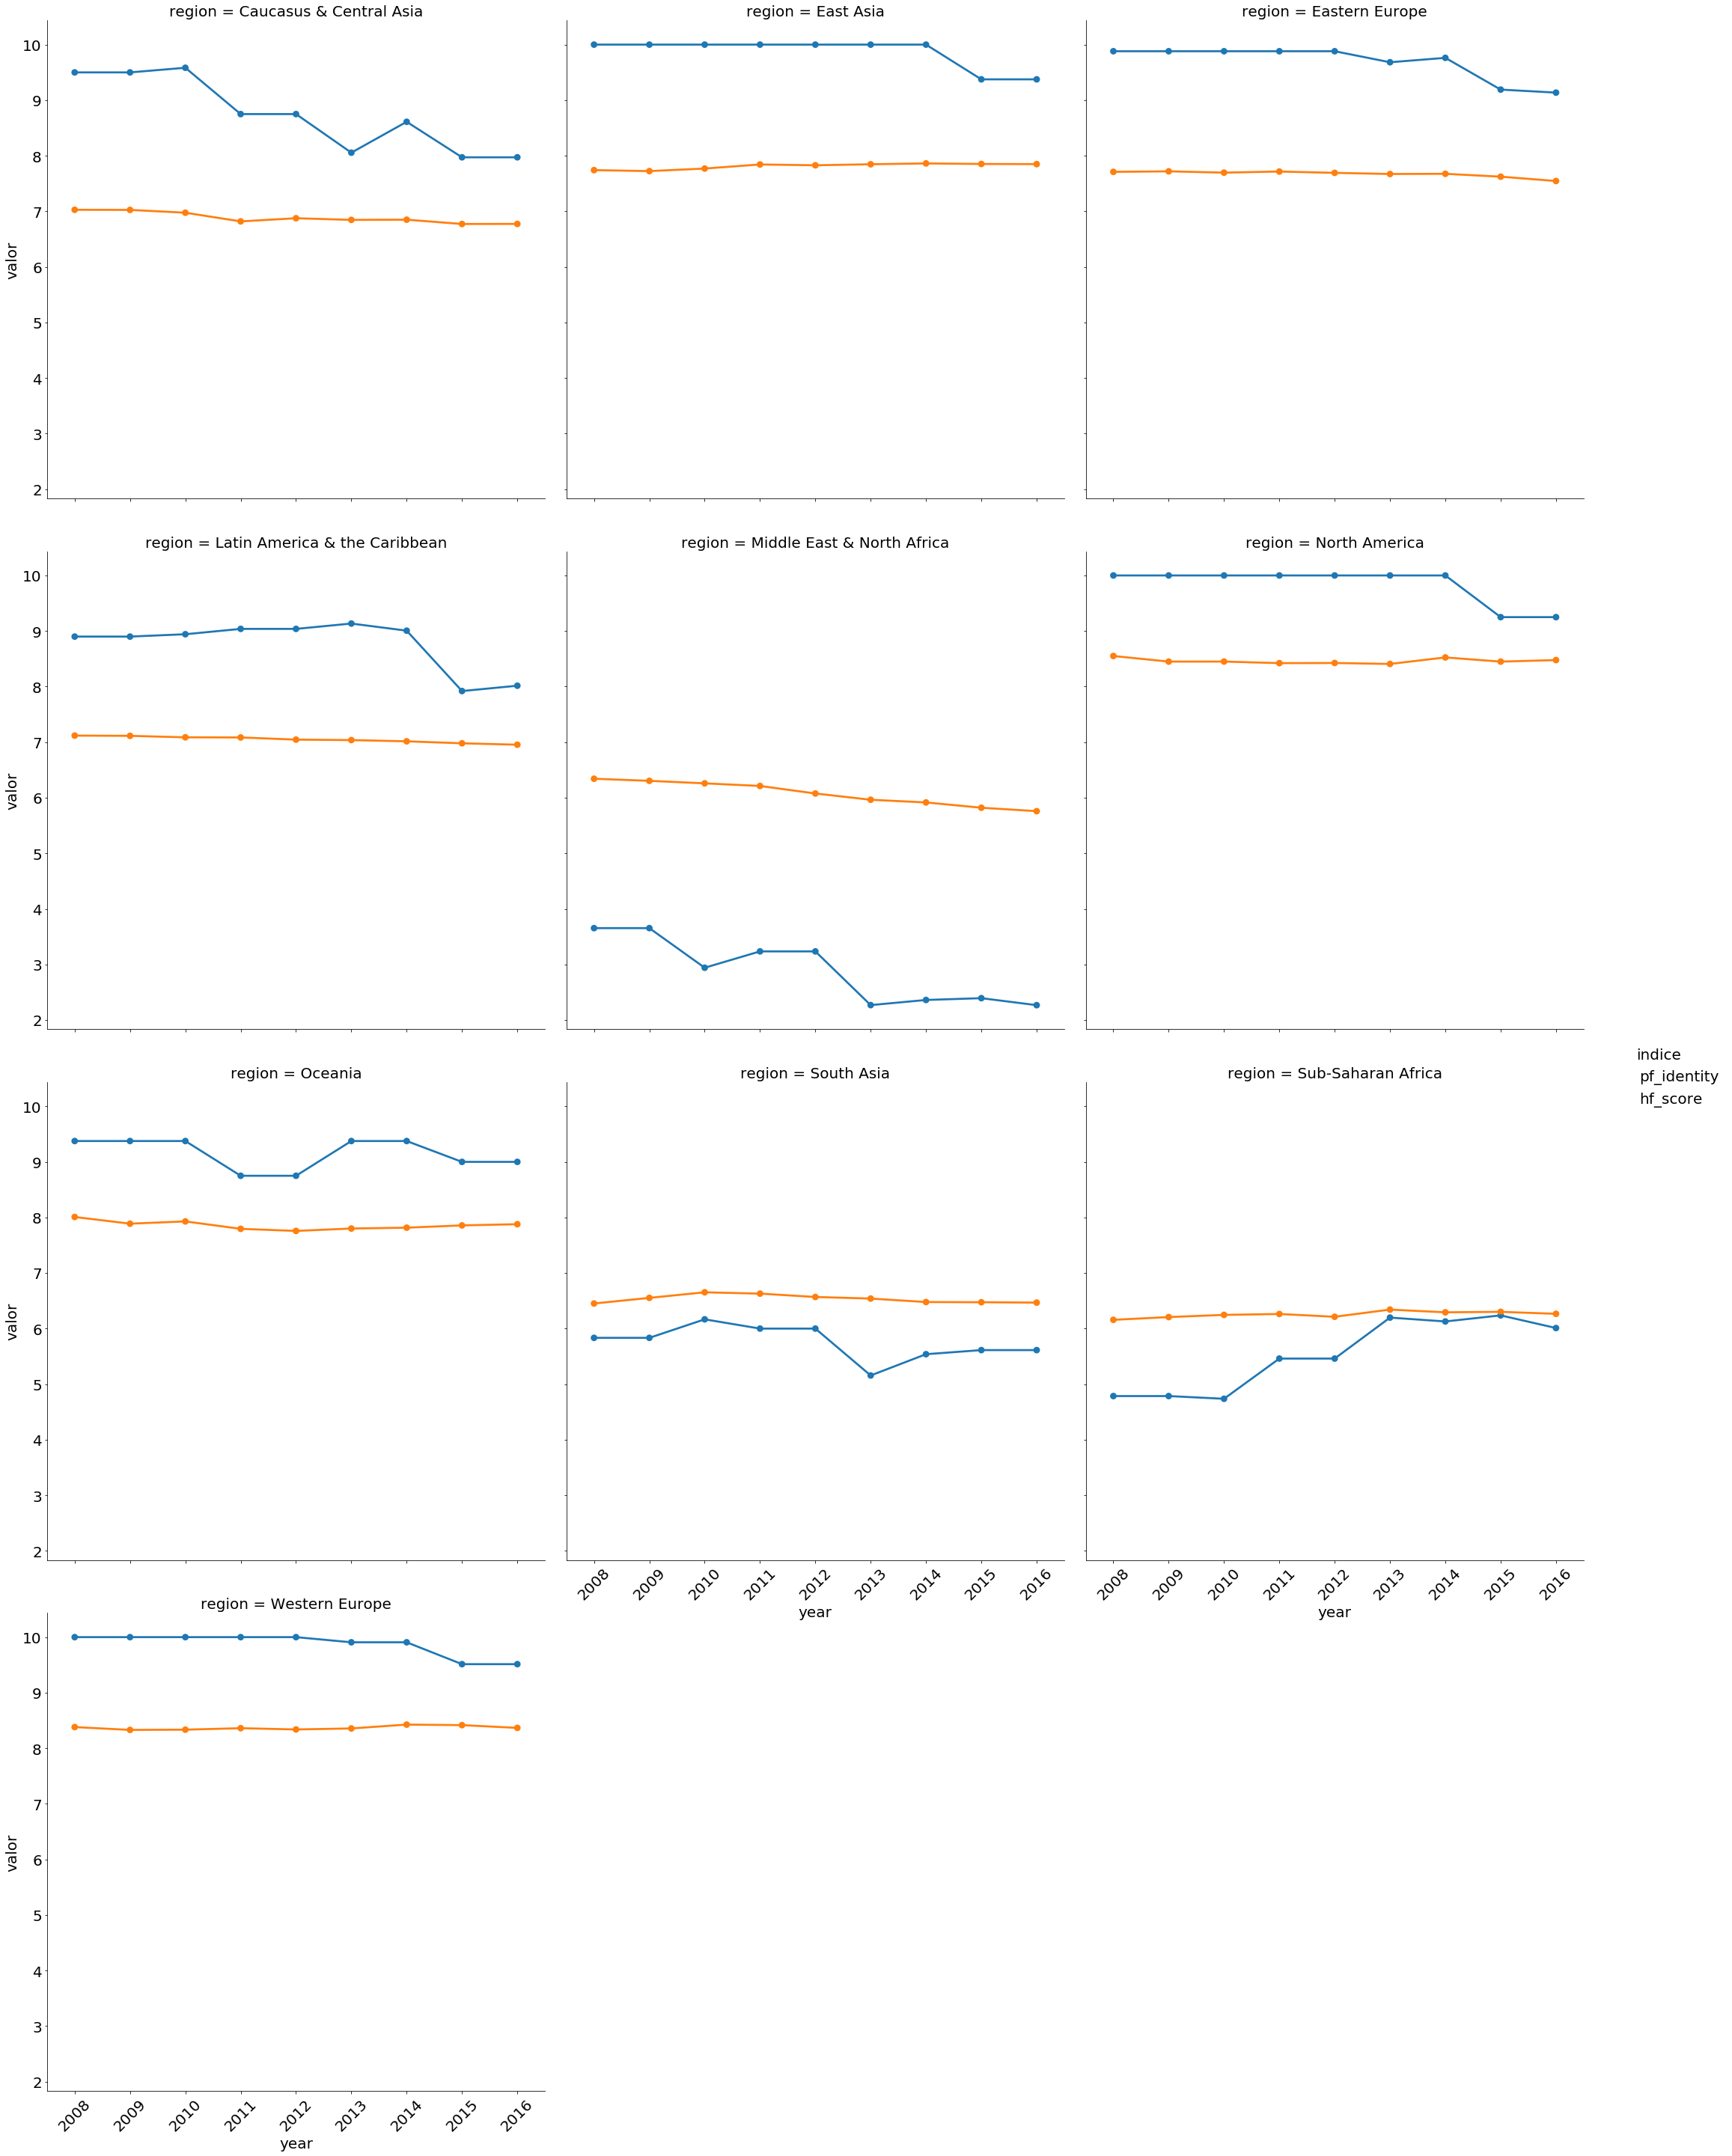

In [17]:
XAR1 = pandas.melt(XAR, id_vars=["year", "region"], 
                    var_name="pf_identity", value_name="valor")

XAR1.rename(columns={'pf_identity':'indice'}, 
                 inplace=True)

XAR2 = pandas.melt(XAR, id_vars=["year", "region"], 
                    var_name="hf_score", value_name="valor")

XAR1.rename(columns={'hf_score':'indice'}, 
                 inplace=True)

XAR_V1 = pandas.concat([XAR1, XAR2], sort=False)

XAR_V1[:5]

g = seaborn.FacetGrid(XAR_V1, col="region", hue="indice", col_wrap=3, height=10)
g.map(seaborn.pointplot, "year", "valor", dodge=.1)
g.set_xticklabels(rotation=45);
g.add_legend()

### 2.3 Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


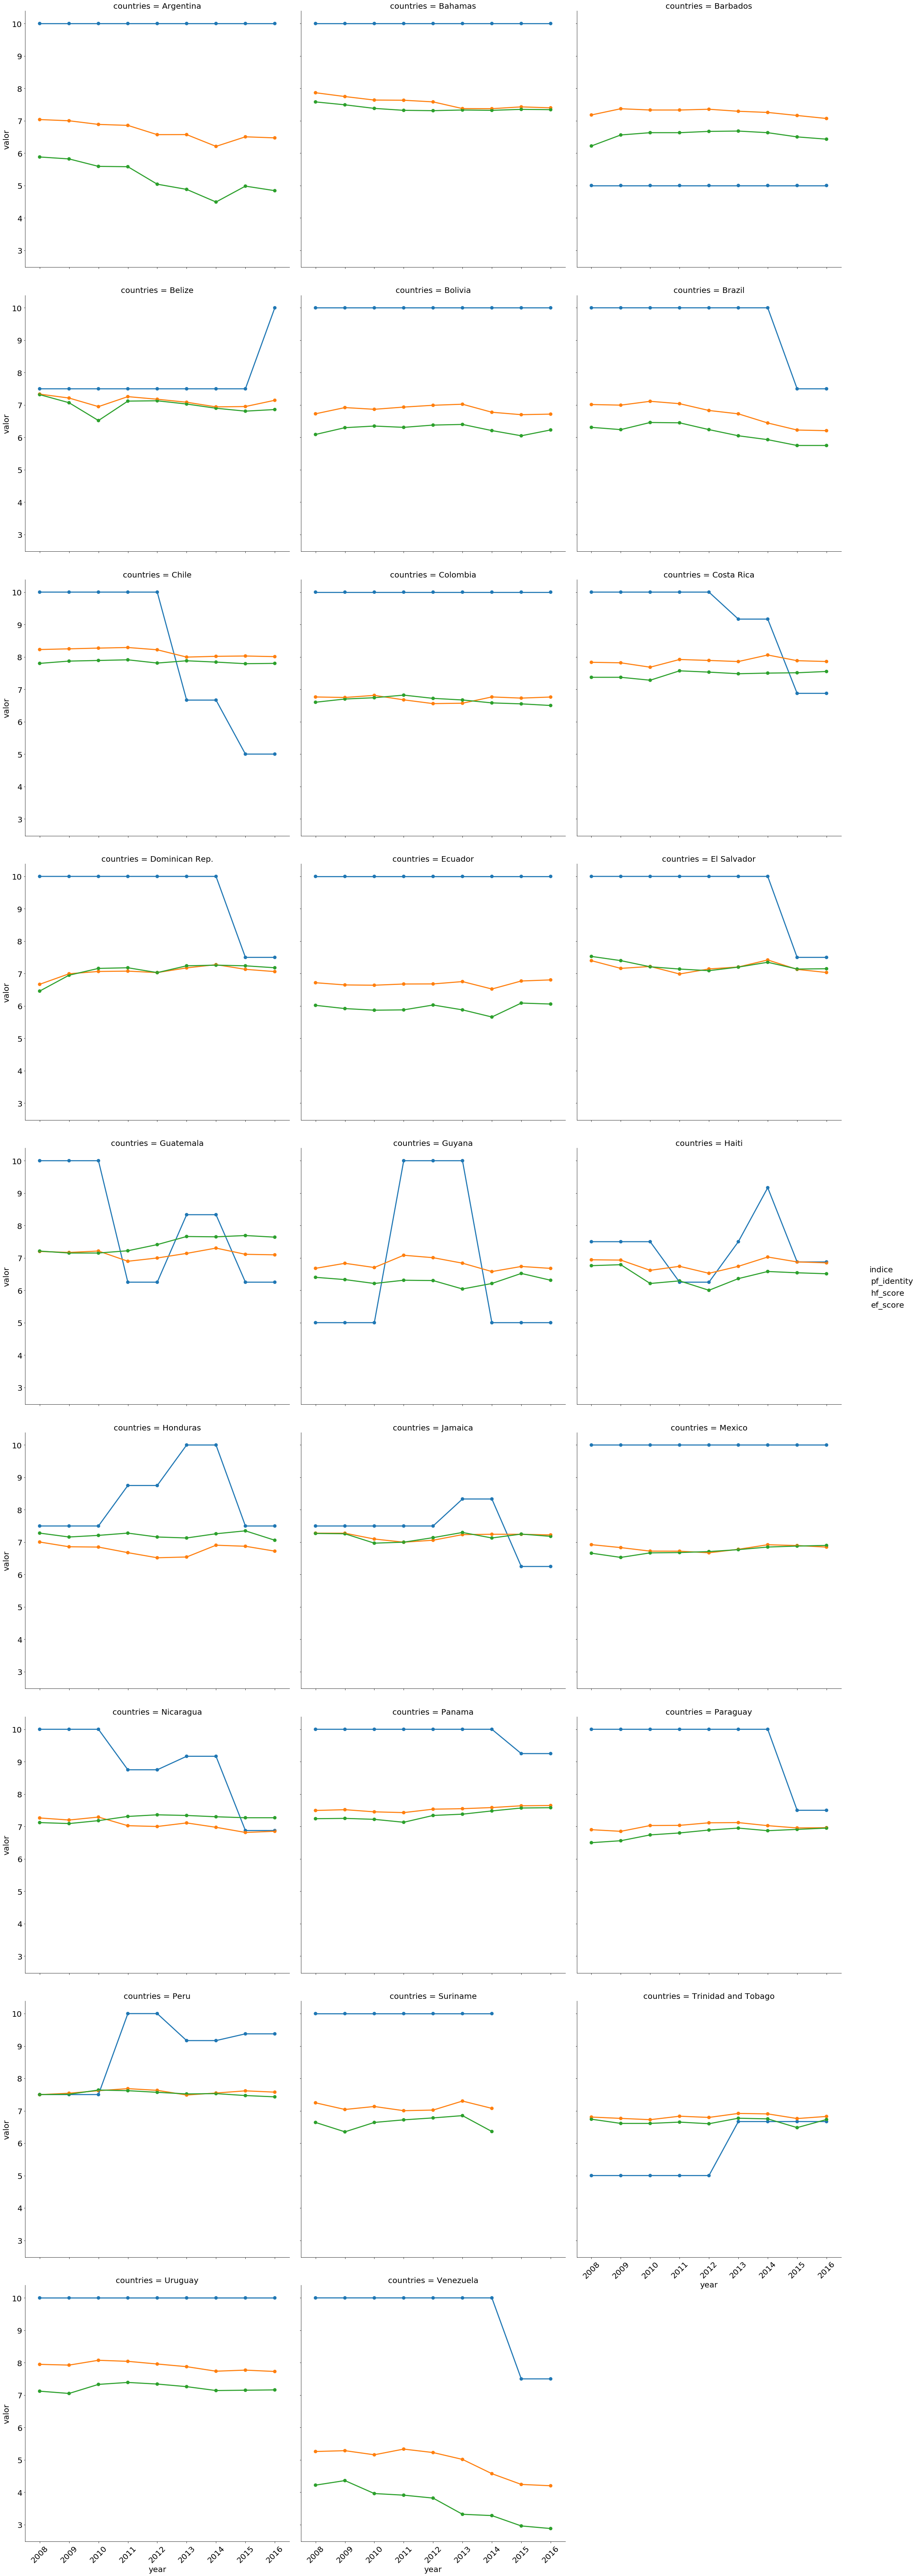

In [18]:
#Realizamos el gráfico de todos los países de latino américa

LA_chico = LA[['year', 'countries', 'pf_identity', 'hf_score', 'ef_score']]
#.dropna()

XAC1 = pandas.melt(LA_chico, id_vars=["year", "countries"], 
                    var_name="pf_identity", value_name="valor")

XAC1.rename(columns={'pf_identity':'indice'}, 
                 inplace=True)

XAC2 = pandas.melt(LA_chico, id_vars=["year", "countries"], 
                    var_name="hf_score", value_name="valor")
XAC2.rename(columns={'hf_score':'indice'}, 
                 inplace=True)

XAC3 = pandas.melt(LA_chico, id_vars=["year", "countries"], 
                    var_name="ef_score", value_name="valor")
XAC3.rename(columns={'ef_score':'indice'}, 
                 inplace=True)

XAC_V2 = pandas.concat([XAC1, XAC2, XAC3], sort=False)

gc = seaborn.FacetGrid(XAC_V2, col="countries", hue="indice", col_wrap=3, height=10)
gc.map(seaborn.pointplot, "year", "valor")
gc.set_xticklabels(rotation=45);
gc.add_legend()

#### Elegimos los países que consideramos tienen mas relevancia.
##### Consideramos como países con mayor relevancia aquellos a los que se están apuntando las misiones comerciales para exportación de software: Perú, Chile, Colombia, México. Considerando países hispano parlantes unicamente.

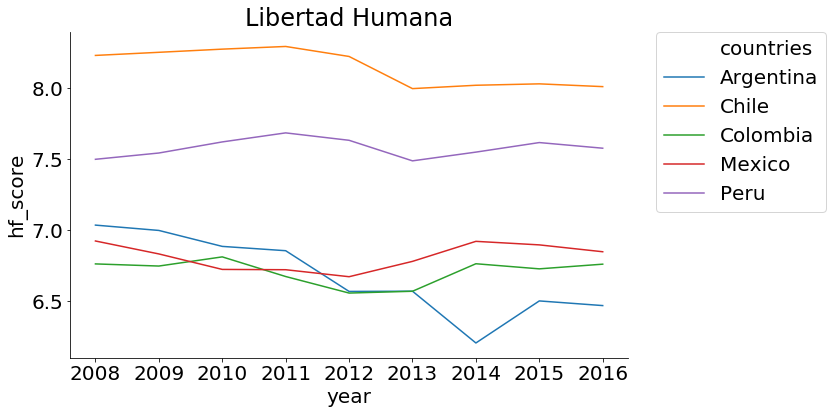

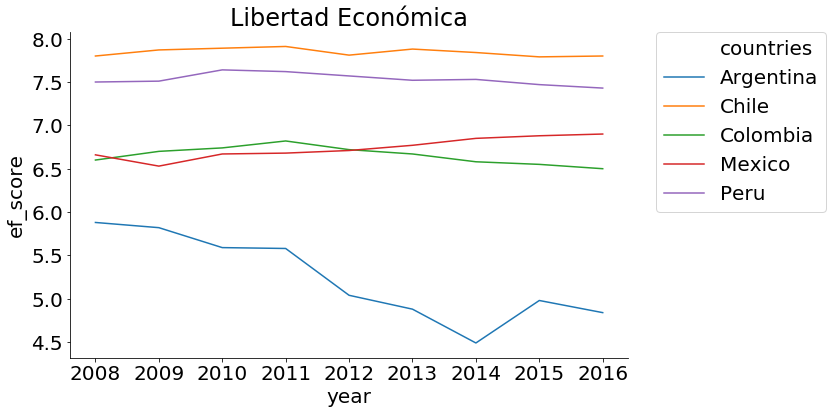

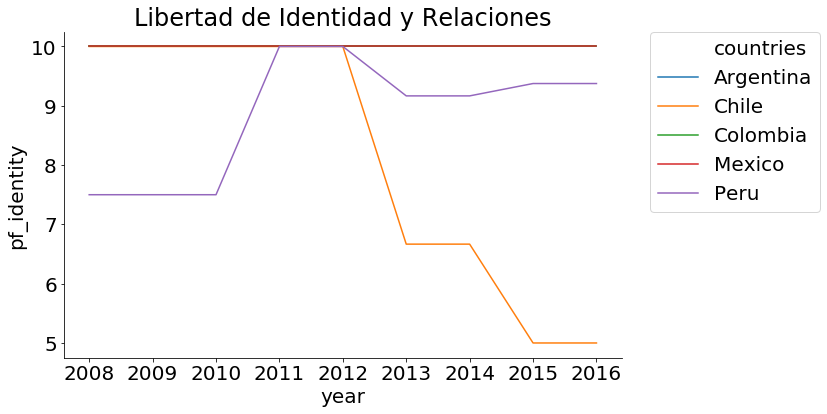

In [19]:
plt.figure(figsize=(10,6))
countries = ['ARG', 'PER', 'MEX', 'COL', 'CHL']
seaborn.lineplot(data=dataset[dataset.ISO_code.isin(countries)], x='year', y='hf_score',
                 hue='countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Libertad Humana')
seaborn.despine()

plt.figure(figsize=(10,6))
countries = ['ARG', 'PER', 'MEX', 'COL', 'CHL']
seaborn.lineplot(data=dataset[dataset.ISO_code.isin(countries)], x='year', y='ef_score',
                 hue='countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Libertad Económica')
seaborn.despine()

plt.figure(figsize=(10,6))
countries = ['ARG', 'PER', 'MEX', 'COL', 'CHL']
seaborn.lineplot(data=dataset[dataset.ISO_code.isin(countries)], x='year', y='pf_identity',
                 hue='countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Libertad de Identidad y Relaciones')
seaborn.despine()

## 3 Distribuciones

### 3.1 Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

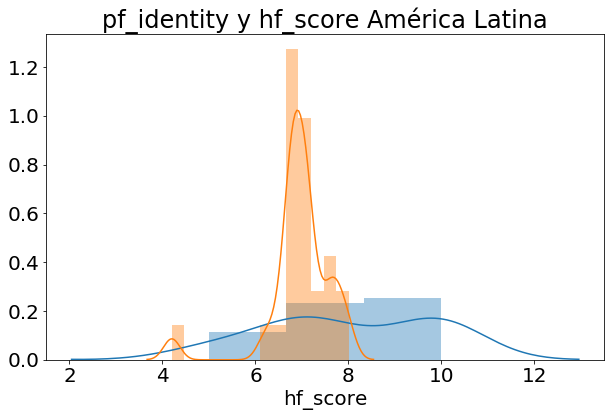

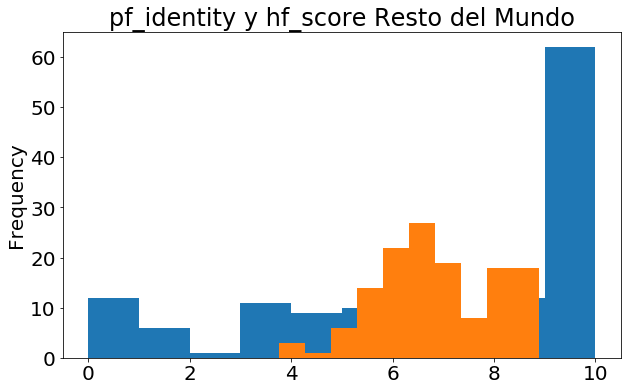

In [20]:
LA2016 = LA[LA['year']==2016]
RM2016 = RM[RM['year']==2016]

plt.figure(figsize=(10,6))
plt.title("pf_identity y hf_score América Latina")
seaborn.distplot(LA2016['pf_identity'].fillna(LA2016['pf_identity'].mean()))
seaborn.distplot(LA2016['hf_score'].fillna(LA2016['hf_score'].mean()))

plt.figure(figsize=(10,6))
plt.title("pf_identity y hf_score Resto del Mundo")
RM2016['pf_identity'].fillna(RM2016['pf_identity'].mean()).plot.hist()
RM2016['hf_score'].fillna(RM2016['pf_identity'].mean()).plot.hist()

### 3.2 Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [24]:
from scipy import stats

loc, scale = stats.expon.fit(LA2016['pf_identity'])
loc, scale

norm_dist = stats.expon(loc, scale)

a,b = stats.kstest(LA2016['pf_identity'], norm_dist.cdf)
print('Estadística=%.30f, p=%.30f' %(a,b))


loc, scale = stats.norm.fit(LA2016['pf_identity'])
loc, scale

norm_dist = stats.norm(loc, scale)

a,b = stats.kstest(LA2016['pf_identity'], norm_dist.cdf)
print('Estadística=%.30f, p=%.30f' %(a,b))

Estadística=0.232242697685001803220572469399, p=0.102462801722488006106459579314
Estadística=0.217662052427766483653215345839, p=0.146303540668457632278887103894


#### En base a los resultados obtenidos no podemos descartar la hipotesis nula de que sea una distribución normal, ni la hipótesis nula de que sea una distribución exponencial

In [25]:
#realizamos la misma evaluación pero por año
def ks_anio(dataset):
    for cc in range(dataset['year'].min(), dataset['year'].max()+1):
        y = cc
        x_array = numpy.array(dataset[dataset['year']==cc].pf_identity.dropna())
        
        loc, scale = stats.expon.fit(dataset[dataset['year']==cc].pf_identity.dropna())
        loc, scale

        norm_dist = stats.expon(loc, scale)

        a,b = stats.kstest(dataset[dataset['year']==cc].pf_identity.dropna(), norm_dist.cdf)
        print('Evaluando distr. exponencial: Año = %4i Estadística=%.30f, p=%.30f' %(y,a,b))
        
        loc, scale = stats.norm.fit(dataset[dataset['year']==cc].pf_identity.dropna())
        loc, scale
        norm_dist = stats.norm(loc, scale)
        a,b = stats.kstest(LA2016['pf_identity'], norm_dist.cdf)
        print('Evaluando distr. normal: Año = %4i Estadística=%.30f, p=%.30f' %(y,a,b))

ks_anio(LA)

Evaluando distr. exponencial: Año = 2008 Estadística=0.402532447913732716049395321534, p=0.000359673619675593414513059543
Evaluando distr. normal: Año = 2008 Estadística=0.365922724404280808041534100994, p=0.001253279075858815261312884104
Evaluando distr. exponencial: Año = 2009 Estadística=0.402532447913732716049395321534, p=0.000359673619675593414513059543
Evaluando distr. normal: Año = 2009 Estadística=0.365922724404280808041534100994, p=0.001253279075858815261312884104
Evaluando distr. exponencial: Año = 2010 Estadística=0.410996192371245627761311425274, p=0.000173641736608054486623586854
Evaluando distr. normal: Año = 2010 Estadística=0.375688156868648648334385597991, p=0.000835017421698891482151339005
Evaluando distr. exponencial: Año = 2011 Estadística=0.402371741040972841219058864226, p=0.000258687754868480723757784290
Evaluando distr. normal: Año = 2011 Estadística=0.403199463368505206517511396669, p=0.000249084036991531476701311476
Evaluando distr. exponencial: Año = 2012 Est

### 3.3 Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


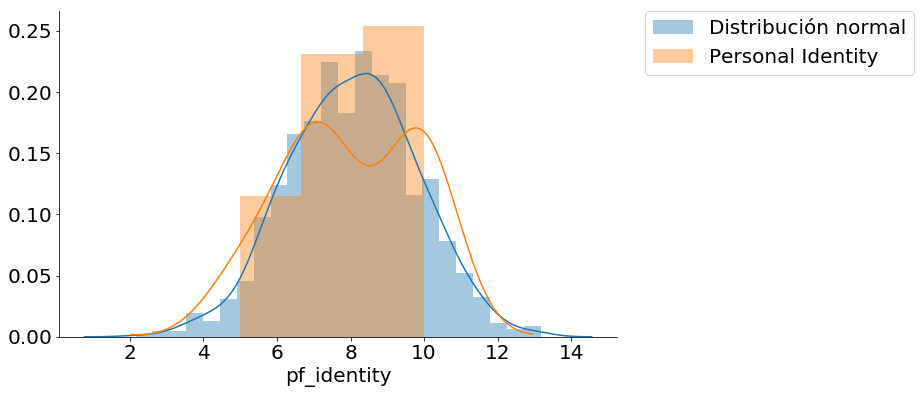

In [26]:
#Vemos las distribuciones comparadas entre una normal y la distribución de pf_identity

loc, scale = stats.norm.fit(LA2016['pf_identity'].dropna())
loc, scale
norm_dist = stats.norm(loc, scale)

sample = norm_dist.rvs(1000)
# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(LA2016['pf_identity'].dropna(), label='Personal Identity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()


In [27]:
percs = numpy.linspace(0,100,11)  # Creamos 10 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(LA2016['pf_identity'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(LA2016['pf_identity'].dropna())), percs)

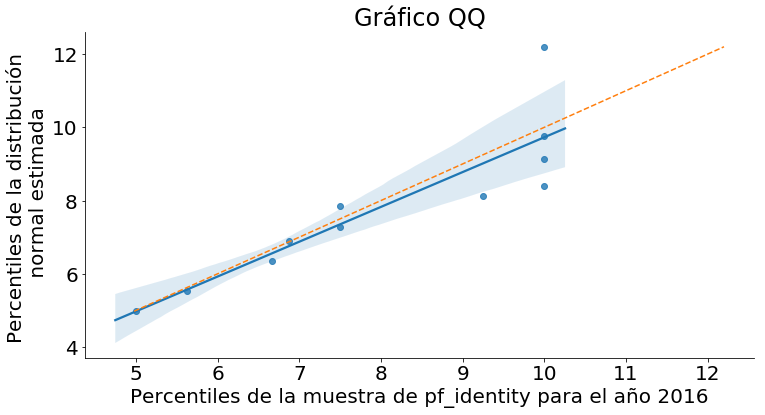

In [28]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de pf_identity para el año 2016')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, ls="--")

seaborn.despine()

### 3.4 Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [29]:
from scipy.stats import kurtosis, skew 

x = qn_norm_dist#DS_MS['pf_identity']
print('excess kurtosis of normal distribution (should be 0): {}'.format(kurtosis(x))) 
print('skewness of normal distribution (should be 0): {}'.format(skew(x))) 

excess kurtosis of normal distribution (should be 0): 0.007765542323013186
skewness of normal distribution (should be 0): 0.6106809096055569


## 4 Correlaciones

### 4.1 ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


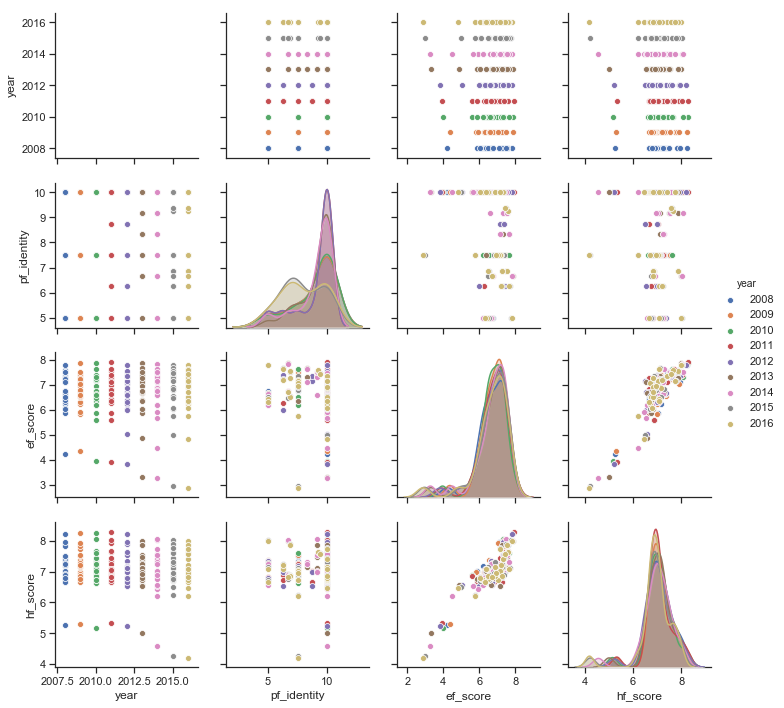

In [30]:
#Primero realizamos el gráfico pairplot
columnas = ['year','pf_identity','ef_score','hf_score']
seaborn.set(style="ticks", color_codes=True)
#iris = seaborn.load_dataset("DS_MS")
g = seaborn.pairplot(LA[columnas].dropna(), hue="year")

Observamos que entre pf_identity y ef_score y hf_score no se visualiza una correlación. Sin embargo si podemos visualizar esta correlación entre las variables hf_score y ef_score. En una primera instancia creemos que si es adecuado el gráfico para ver la falta de correlación entre pf_identity y las otras 2 variables

### 4.2 Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.

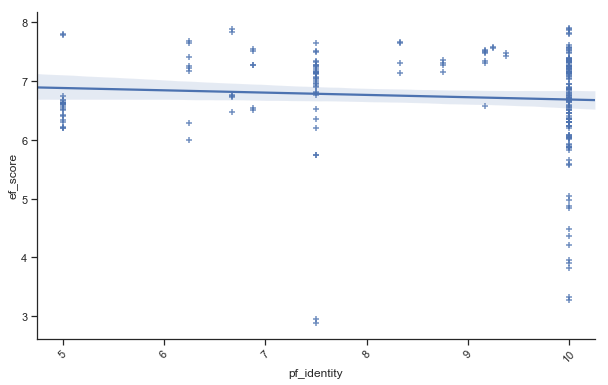

In [31]:
#Primero verificamos la correlación entre las variables pf_identity y ef_score

plt.figure(figsize=(10,6))
seaborn.regplot(data=LA[columnas].dropna(),
                x='pf_identity', y='ef_score',
                marker='+')
plt.xticks(rotation=45)
seaborn.despine()


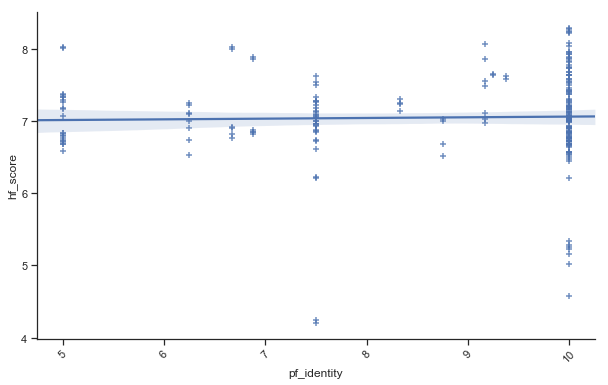

In [32]:
#Verificamos ahora la correlación entre las variables pf_identity y hf_score

plt.figure(figsize=(10,6))
seaborn.regplot(data=LA[columnas].dropna(),
                x='pf_identity', y='hf_score',
                marker='+')
plt.xticks(rotation=45)
seaborn.despine()


#### En ambos casos podemos visualizar que no existe una correlación entre las variables. A continuación colocamos el mismo gráfico para verificar la correlacion de las variables ef_score y hf_score y demostrar que las mismas tienen un alto grado de correlación

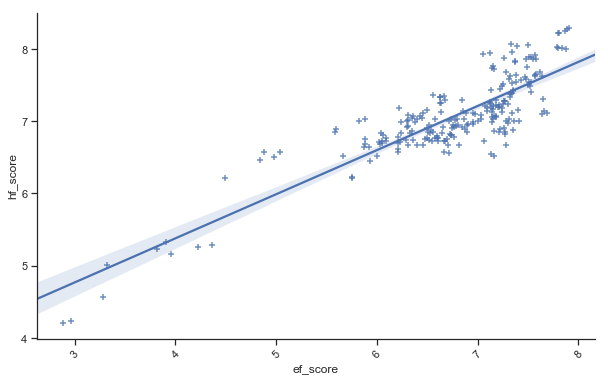

In [33]:
plt.figure(figsize=(10,6))
seaborn.regplot(data=LA[columnas].dropna(),
                x='ef_score', y='hf_score',
                marker='+')
plt.xticks(rotation=45)
seaborn.despine()

### 4.3 Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.

#### Para poder calcular el coeficiente de correlación utilizaremos el coeficiente de pearson:

In [34]:
numpy.corrcoef(LA2016['pf_identity'].dropna(), LA2016['hf_score'].dropna())


array([[1.        , 0.00676287],
       [0.00676287, 1.        ]])

Vemos que existe una correlación positiva entre ambas variables (Si 0 < r < 1, existe una correlación positiva). Esto nos hace replantearnos la interpretación que realizamos al gráfico pairplot del punto anterior en el cual malinterpretamos que no existía dicha correlación.

A modo de evaluación realizamos el mismo coeficiente (pearson) para: 

1. pf_identity y ef_score
2. ef_score y hf_score

In [35]:
numpy.corrcoef(LA2016['pf_identity'].dropna(), LA2016['ef_score'].dropna())

array([[ 1.        , -0.12313057],
       [-0.12313057,  1.        ]])

In [36]:
numpy.corrcoef(LA2016['ef_score'].dropna(), LA2016['hf_score'].dropna())

array([[1.        , 0.90553752],
       [0.90553752, 1.        ]])

#### 4.4 Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test

#### No logramos identificar un test que pudieramos realizar, dentro del espectro de conocimientos que poseemos sobre estadística. Es por este motivo que realizamos un gráfico de barra donde podemos comparar de manera visual las regiones y la media de los valores, y quizás interpretar si tiene una correlación la región con dichos datos

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

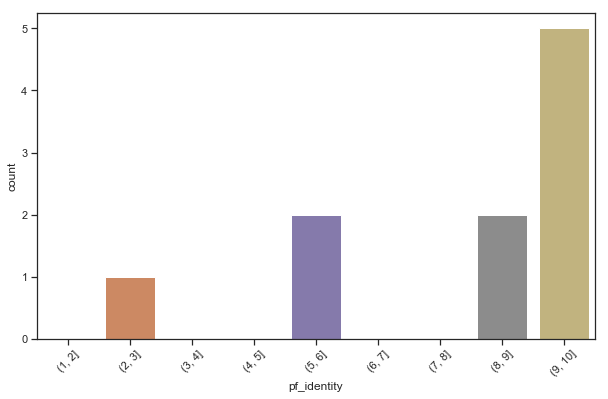

In [37]:
MR = dataset.groupby(['region'], as_index=False)['pf_identity','ef_score','hf_score'].mean()

MR


def to_categorical(column, bin_size=1, min_cut=1, max_cut=20):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(numpy.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pandas.cut(column, pandas.IntervalIndex.from_tuples(intervals))


seaborn.countplot(to_categorical(MR.pf_identity.dropna()))
plt.xticks(rotation=45)

In [38]:
exp = dataset[['region', to_categorical(MR.pf_identity.dropna())]]
exp = exp.pivot_table(index='region', columns=to_categorical(MR.pf_identity.dropna()), aggfunc=len, fill_value=0)
seaborn.heatmap(exp)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

A través de la interpretación del gráfico previamente mostrado, podemos inferir que las regiones de menor desarrollo (llamado tercer mundo) son aquellas que poseen los menores indices de libertad social, económica y por consiguiente humana. Podemos visualizar de manera rápida en el gráfico como Medio Oriente, Asia del Sur y Africa son las regiones de menor libertad social.